In [1]:
import my_groover_oop as gr_oop

We are going to insert respective path into a varialbe as well as path for out graph output and define number of realizations of our future algorithm in variable shots


In [3]:
path = "clauses_small.txt"
graph_file ="graph_file_small"
shots = 1000

In the next step, we are going to parse the input and store information in variables inside our instance

In [4]:
algorithm = gr_oop.GroversAlgorithm(path,shots)

Lets check, what we have inside

In [5]:
print(algorithm._diffuser_qubits_count)
print(algorithm._clause_qubits_count)
print(algorithm._all_qubits_count)

4
4
9


Lets check what is inside of clauses, it is list of lists, where inner lists contains our clauses from input

In [6]:
algorithm._clauses

[[0, 1], [0, 2], [1, 3], [2, 3]]

We see that current realization of algorithm to solve such problems require 9 quibts, 4 of it are qubits for measuring, 4 are support qubits for clause realization and last qubit is qubit for |->, that helps flip phases of qubits, which are going to be .

In next step we are going to setup gates, that will use the information and will merge into final circuit, which will compute our results

In [7]:
algorithm.circuit_setup()

Lets check what is inside our gates

In [8]:
print(algorithm._init_gate_realization)

     ┌───┐     
q_0: ┤ H ├─────
     ├───┤     
q_1: ┤ H ├─────
     ├───┤     
q_2: ┤ H ├─────
     ├───┤     
q_3: ┤ H ├─────
     └───┘     
q_4: ──────────
               
q_5: ──────────
               
q_6: ──────────
               
q_7: ──────────
     ┌───┐┌───┐
q_8: ┤ X ├┤ H ├
     └───┘└───┘


In [9]:
print(algorithm._oracle_gate_realization)

                                                                           »
q_0: ──■─────────■──────────────────────────────────■─────────■────────────»
       │         │                                  │         │            »
q_1: ──┼────■────┼─────────■────────────────────────┼────■────┼─────────■──»
       │    │    │         │                        │    │    │         │  »
q_2: ──┼────┼────┼────■────┼─────────■──────────────┼────┼────┼────■────┼──»
       │    │    │    │    │         │              │    │    │    │    │  »
q_3: ──┼────┼────┼────┼────┼────■────┼────■─────────┼────┼────┼────┼────┼──»
     ┌─┴─┐┌─┴─┐  │    │    │    │    │    │       ┌─┴─┐┌─┴─┐  │    │    │  »
q_4: ┤ X ├┤ X ├──┼────┼────┼────┼────┼────┼────■──┤ X ├┤ X ├──┼────┼────┼──»
     └───┘└───┘┌─┴─┐┌─┴─┐  │    │    │    │    │  └───┘└───┘┌─┴─┐┌─┴─┐  │  »
q_5: ──────────┤ X ├┤ X ├──┼────┼────┼────┼────■────────────┤ X ├┤ X ├──┼──»
               └───┘└───┘┌─┴─┐┌─┴─┐  │    │    │            └───┘└───┘┌─┴─┐»

In [10]:
print(algorithm._diffuser_gate_realization)

     ┌───┐┌───┐     ┌───┐┌───┐
q_0: ┤ H ├┤ X ├──■──┤ X ├┤ H ├
     ├───┤├───┤  │  ├───┤├───┤
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├
     ├───┤├───┤  │  ├───┤├───┤
q_2: ┤ H ├┤ X ├──■──┤ X ├┤ H ├
     ├───┤└───┘┌─┴─┐├───┤└───┘
q_3: ┤ Z ├─────┤ X ├┤ Z ├─────
     └───┘     └───┘└───┘     


Everything is correct for this input, now we just need to compute the actual results

In [11]:
algorithm.grovers()

In [12]:
algorithm._counts

{'0010': 9,
 '0001': 22,
 '1111': 15,
 '1101': 12,
 '1100': 13,
 '0110': 381,
 '1000': 15,
 '1001': 397,
 '0101': 19,
 '1110': 18,
 '1011': 21,
 '0111': 21,
 '0011': 11,
 '0100': 17,
 '0000': 9,
 '1010': 20}

And lets store it as a plot :), there is important argument "path"


In [13]:
algorithm.my_plot(graph_file)

We can also vizualize it, just dont use path argument

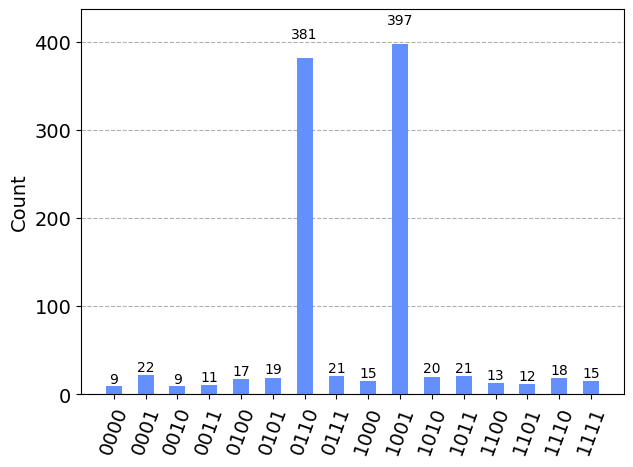

In [14]:
algorithm.my_plot()

Now lets do everything quicker for tweaked input

In [16]:
path  = "clauses_large.txt"
graph_file = "graph_file_large"
shotrs = 1000
algorithm = gr_oop.GroversAlgorithm(path,shots)

In [17]:
algorithm.circuit_setup()
algorithm.grovers()

In [18]:
algorithm._counts

{'11100': 13,
 '10011': 15,
 '11000': 26,
 '01001': 14,
 '10001': 23,
 '11010': 18,
 '00101': 13,
 '01000': 7,
 '01100': 24,
 '10101': 229,
 '10010': 17,
 '10100': 17,
 '10111': 16,
 '01011': 12,
 '01110': 23,
 '00010': 20,
 '00000': 14,
 '11001': 12,
 '01010': 261,
 '10000': 17,
 '11111': 25,
 '11011': 10,
 '01111': 12,
 '11101': 16,
 '00011': 19,
 '00111': 17,
 '01101': 21,
 '10110': 20,
 '00001': 16,
 '00110': 23,
 '00100': 17,
 '11110': 13}

In [19]:
algorithm.my_plot(graph_file)

Again we see that it works

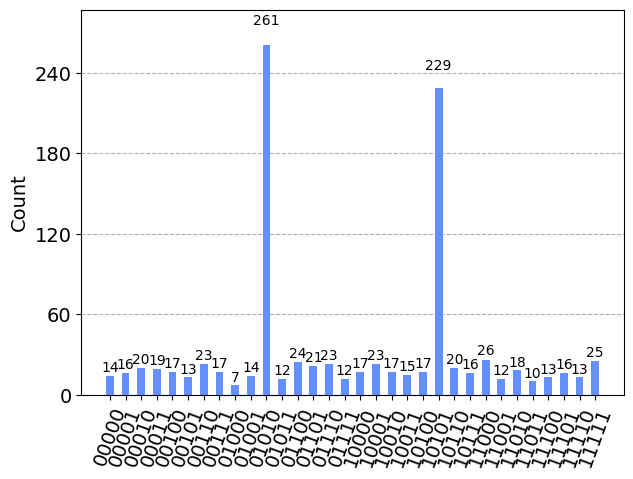

In [25]:
algorithm.my_plot()